### <center>Ângelo Pascoal Figueiral, 44645</center>

## Assignment 1 Machine Learning

This assignment will contain 2 questions with details as below. The due date is Feburary 28 (Sunday), 2020 23:59PM. Each late day will result in 20% loss of total points.

### Question 1  (20 points) Make a plan before running your model

Joana Gonzales, a young professional looking to diversify her investment portfolio. Joana graduated with a Masters in Business Analytics, and after four successful years as a product manager in a tech company, she has managed to save a sizable amount of money. She now wants to start diversifying her savings portfolio. So far, she has focused on traditional investments (stocks, bonds, etc.) and she now wants to look further afield. One asset class she is particularly interested in is peer-to-peer loans issued on online platforms. The high returns advertised by these platforms seem to be an attractive value proposition, and Joana is especially excited by the large amount of data these platforms make publicly available. With her data science background, she is hoping to apply machine learning tools to these data to come up with lucrative investment strategies. 

Peer-to-peer lending refers to the practice of lending money to individuals (or small businesses) via online services that match anonymous lenders with borrowers. Lenders can typically earn higher returns relative to savings and investment products offered by banking institutions. However, there is of course the risk that the borrower defaults on his or her loan. Interest rates are usually set by an intermediary platform on the basis of analyzing the borrower's credit (using features such as FICO score, employment status, annual income, debt-to-income ratio, number of open credit lines). The intermediary platform generates revenue by collecting a one-time fee on funded loans (from borrowers) and by charging a loan servicing fee to investors.

The peer-to-peer lending industry in the United States started in February 2006 with the launch of Prosper,‡ followed by LendingClub.§ In 2008, the Securities and Exchange Commission (SEC) required that peer-to-peer companies register their offerings as securities, pursuant to the Securities Act of 1933. Both Prosper and LendingClub gained approval from the SEC to offer investors notes backed by payments received on the loans. One of the interesting features of the peer-to-peer lending market is the richness of the historical data available. The two largest U.S. platforms (LendingClub and Prosper) have chosen to give free access to their data to potential investors. The definition of each loan status is as follows. Current refers to a loan that is still being reimbursed in a timely manner. Late corresponds to a loan on which a payment is between 16 and 120 days overdue. If the payment is delayed by more than 121 days, the loan is considered to be in Default. 



If you were Joana, your job is to define investment strategies. Given your knowledge of data science, below you need to write a plan (~500 words), using the steps specified from business problem to machine learning problem. Writing down in the below cell using Markdown.

## Answer:

Before deciding to to use a Machine Learning model to help her decisions, Joana must evaluate if and how her strategy could be enhaced with such model. To assess this need, the first question is whether there's room for **task automation**. Since analyzing loan possibilities case by case would be a very lenghty and manual process, she definetely needs some sort of automatic classification method, one that would learn overtime. Another good indicator that machine learning is applicable here is the **high complexity of the rules** that set a loan's probability of success.

The large quantity of historical data available, structured the right way, could be helpful on building a model that would **return Joana a list of the loan opportunities that are most likely to payoff**, considering both the potential returns and default probability. 

When it comes to data, Joana needs to ensure its **quality** and **quantity**: is there enough historical labeled data to build a good and efficient model? Is it going to be helpful to reach the desired output? She might use interest rates, loan amounts, monthly instalments and attributes related to the borrower (FICO score, annual income, etc) to build this model. Since the model would derive its parameters from data, Joana needs to analyze if there are **logical patterns in the relation betweem the independent variables and the returns** (by the nature of the task, one would expect there is). If it is patterned data then it is possible to extract output from it, otherwise the bad data would make the use of machine learning inefficient.

Once the data has been structured and assuming there is enough labeled data and there are meaningful patterns, she can define the classes for the algorithm's output, which would **represent the outputs in a rank of loan opportunities** (A-F, 0-10, etc).

Crucially, Joana needs to optimize this model by training the model, minimizing the error. A common used approach in portfolio optimization is to consider the standard deviation/variance of the return, that is, to account for the portfolio risk. In this case, k-means could be used to cluster loan opportunities.

At last, in order to keep the model efficient, it needs to be constantly fed with labels to its ongoing predictions, creating a learning cycle, since the nature of the data keeps changing. That is, Joana would feed the algorithm with the results of her investments, so that the model could update its parameters based on the new data. Ideally, this process would be automatic.

The definition of an **appropriate metric for success** would be crucial, and in this case it could be the percentage of loans where the model correctly predicted to profit, or, in a more complex level, the level of returns predicted versus the level of returns obtained.

---

### Question 2 (50 points) Zestimate this house

Purchasing a house is a very big decision for most of us. Companies such as Zillows collected tons of data regarding the listing and sold price of American houses and build the predictive model, named *Zestimate*. You are expected to build a model similar as Zestimate to predict house price in Boston. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
dataset = load_boston()
X, y = load_boston(return_X_y=True)

#### Question 2.1 (10 points) 
Create train and test set, each contains 80% and 20% of the dataset, respectively using *train_test_split* function in scikit-learn. Train a linear model on the train set and test on the test set, report the training error and test errors, respectively (as mean squared error)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)

# creating the linear regression model
lr = LinearRegression(normalize=True)

# fitting the linear regression model to the training data
lr.fit(X_train, y_train)

# estimating y with the model
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

# calculating training and test mean squared errors
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)


print(f"""Training set MSE: {round(mse_train,2)}\nTest set MSE: {round(mse_test, 2)}""")

Training set MSE: 19.33
Test set MSE: 33.45


#### Question 2.2 (10 points)

Perform a 10-fold cross-validation on the whole data set. Show the averaged mean sqaured error on both train and test set at each fold, explain your findings.

In [102]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

# making sure each fold is 20% test set and 80% training set (from the documentation)
cv_custom_split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# performing 2-degree polynomial regression with cross validation while keeping the train and test errors at each fold
scores = cross_validate(lr, X, y, scoring='neg_mean_squared_error', cv=cv_custom_split, return_train_score=True)

# creating a dataframe for proper error visualization (each fold and average)
    # each fold
dic_scores = {'Train set MSE': -np.round(scores['train_score'], 2),
        'Test set MSE': -np.round(scores['test_score'], 2)
       }

df_scores = pd.DataFrame(dic_scores, index = [i for i in range(1, 11)])

    # average 
avg_train_mse = round(np.mean(df_scores['Train set MSE']), 2)
avg_test_mse = round(np.mean(df_scores['Test set MSE']), 2)

avg_df = pd.DataFrame([[avg_train_mse, avg_test_mse]], columns=['Train set MSE', 'Test set MSE'], index=['Average'])
df_scores.append(avg_df)

,Train set MSE,Test set MSE
1,19.33,33.45
2,18.76,35.23
3,20.25,29.27
4,21.80,23.68
5,23.06,18.31
6,23.76,15.51
7,21.99,24.49
8,22.58,19.75
9,21.01,26.98
10,20.02,30.96


## Findings (Question 2.2):

Cross-validation helps us understand that the test error previously obtained (33.45) is not even close to the average error when splitting the dataset randomly. With these 10 folds, we realise the test error is much lower than we would think had we not used cross-validation. Additionally, it allows us to verify that the test error has quite some variance, since values have a large range (about 20 units), while the train error does not, since values have a narrow range (about 4 units).

---

#### Question 2.3 (10 points) 
 
Add 2-degree polynomial features (with no interactions) and perform 10-fold cross-validation on the whole data set. Show the mean sqaured error on both train and test set at each fold, explain your findings.

In [103]:
# adding polynomial terms WITHOUT INTERACTIONS
X_poly_no_interactions = np.hstack((X, X**2))

# making sure each fold is 20% test set and 80% training set (from the documentation)
cv_custom_split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# performing linear regression of the 2-degree polynomials with cross validation while keeping the train and test errors at each fold
scores = cross_validate(lr, X_poly_no_interactions, y, scoring='neg_mean_squared_error', cv=cv_custom_split, return_train_score=True)

# creating a dataframe for proper error visualization (each fold and average)
    # each fold
dic_scores = {'Train set MSE': -np.round(scores['train_score'], 2),
        'Test set MSE': -np.round(scores['test_score'], 2)
       }

df_scores = pd.DataFrame(dic_scores, index = [i for i in range(1, 11)])

    # average 
avg_train_mse = round(np.mean(df_scores['Train set MSE']), 2)
avg_test_mse = round(np.mean(df_scores['Test set MSE']), 2)

avg_df = pd.DataFrame([[avg_train_mse, avg_test_mse]], columns=['Train set MSE', 'Test set MSE'], index=['Average'])
df_scores.append(avg_df)

,Train set MSE,Test set MSE
1,11.93,25.65
2,10.91,30.49
3,13.21,19.68
4,14.84,13.01
5,14.75,13.06
6,15.27,11.56
7,13.47,20.11
8,14.54,14.51
9,13.94,17.17
10,11.56,27.78


In [104]:
# UNCOMMENT CELLS BELLOW AND RUN TO INCLUDE INTERACTION TERMS

# from sklearn.preprocessing import PolynomialFeatures

# poly_features = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly_features.fit_transform(X)

# # making sure each fold is 20% test set and 80% training set (from the documentation)
# cv_custom_split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# # performing linear regression of the 2-degree polynomials with cross validation while keeping the train and test errors at each fold
# scores = cross_validate(lr, X_poly, y, scoring='neg_mean_squared_error', cv=cv_custom_split, return_train_score=True)

# # creating a dataframe for proper error visualization (each fold and average)
#     # each fold
# dic_scores = {'Train set MSE': -np.round(scores['train_score'], 2),
#         'Test set MSE': -np.round(scores['test_score'], 2)
#        }

# df_scores = pd.DataFrame(dic_scores, index = [i for i in range(1, 11)])

#     # average 
# avg_train_mse = round(np.mean(df_scores['Train set MSE']), 2)
# avg_test_mse = round(np.mean(df_scores['Test set MSE']), 2)

# avg_df = pd.DataFrame([[avg_train_mse, avg_test_mse]], columns=['Train set MSE', 'Test set MSE'], index=['Average'])
# df_scores.append(avg_df)

## Findings (Question 2.3):

- As expected, inclduing polynomial transformations of the features improved the fit to the training data, which is why the training error decreased about 35% on avg
- The avg decrease of the test error (about 25%) shows that the model improved, and that two degree polynomials are within the range of no overfitting
- Although the test error in some folds is still quite high, it's worth noting that it decreased in each and every fold (comparing with the linear combination of features)

---

#### Question 2.4 (20 points)

Perform cross-validation using ridge regression and lasso regression on different feature combinations (linear features vs. polynomial features respectively. Explain which method works better in this case. Check the coefficient and explain the differences between ridge regression and lasso regression.



### Linear

In [106]:
# Ridge, Linear features
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=0)
ridge_reg.fit(X_train, y_train)


# making sure each fold is 20% test set and 80% training set (from the documentation)
cv_custom_split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# performing linear regression with cross validation
scores_ridge_linear = cross_validate(ridge_reg, X, y, scoring='neg_mean_squared_error', cv=cv_custom_split, return_train_score=True, return_estimator=True)

# displaying
for (i, fold) in zip(range(1, len(scores_ridge_linear['estimator'])+1), scores_ridge_linear['estimator']):
    print(f"Fold {i}: \nCoefficients:\t{fold.coef_}\nTest MSE:\t{np.abs([scores_ridge_linear['test_score'][i-1]])}\n")  # coefficients and test error for each fold

print(f"\nAVERAGE TEST MSE: {round(np.mean(-scores_ridge_linear['test_score']), 2)}")  # average test error

Fold 1: 
Coefficients:	[-1.16807614e-01  4.60034842e-02 -2.37620690e-02  2.27814972e+00
 -8.55779612e+00  3.75513528e+00 -1.04143035e-02 -1.28009479e+00
  2.22037885e-01 -1.15255734e-02 -9.69288272e-01  8.53481709e-03
 -4.98849035e-01]
Test MSE:	[34.23160611]

Fold 2: 
Coefficients:	[-9.02872707e-02  3.11974576e-02 -2.28383681e-02  2.16297753e+00
 -9.16448771e+00  4.12731175e+00 -2.80443971e-03 -1.17165539e+00
  2.56094400e-01 -1.28543938e-02 -8.75008618e-01  8.24207592e-03
 -5.27186101e-01]
Test MSE:	[35.77716764]

Fold 3: 
Coefficients:	[-9.14358739e-02  4.60844054e-02 -6.77035843e-03  1.36167312e+00
 -9.38886277e+00  3.94430321e+00 -2.79920771e-03 -1.28408137e+00
  3.03676077e-01 -1.41502228e-02 -9.57329349e-01  7.92132130e-03
 -5.39016424e-01]
Test MSE:	[29.56036621]

Fold 4: 
Coefficients:	[ -0.12968252   0.05103616  -0.04858725   2.35325635 -10.18331896
   3.59761433  -0.01184109  -1.34775461   0.32059548  -0.01253183
  -0.749863     0.01074167  -0.50003508]
Test MSE:	[23.7589301

In [107]:
# Lasso, Linear features
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train, y_train)


# making sure each fold is 20% test set and 80% training set (from the documentation)
cv_custom_split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# performing linear regression with cross validation
scores_lasso_linear = cross_validate(lasso_reg, X, y, scoring='neg_mean_squared_error', cv=cv_custom_split, return_train_score=True, return_estimator=True)

# displaying
for (i, fold) in zip(range(1, len(scores_lasso_linear['estimator'])+1), scores_lasso_linear['estimator']):
    print(f"Fold {i}: \nCoefficients:\t{fold.coef_}\nTest MSE:\t{np.abs([scores_lasso_linear['test_score'][i-1]])}\n")  # coefficients and test error for each fold

print(f"\nAVERAGE TEST MSE: {round(np.mean(-scores_lasso_linear['test_score']), 2)}")  # average test error

Fold 1: 
Coefficients:	[-0.05889028  0.05317657 -0.          0.         -0.          0.67954962
  0.01684077 -0.6487664   0.198738   -0.01399421 -0.86421958  0.00660309
 -0.73120957]
Test MSE:	[41.7000968]

Fold 2: 
Coefficients:	[-0.04944984  0.0302011  -0.00328382  0.         -0.          1.07546833
  0.02734036 -0.45342361  0.23525599 -0.01550802 -0.70649063  0.00644508
 -0.75565653]
Test MSE:	[42.37487215]

Fold 3: 
Coefficients:	[-0.05218059  0.05322569 -0.          0.         -0.          1.01086155
  0.02760415 -0.60592167  0.28355942 -0.0159251  -0.82848051  0.00643565
 -0.7742264 ]
Test MSE:	[34.56153127]

Fold 4: 
Coefficients:	[-0.09285087  0.05307795 -0.04850117  0.         -0.          0.30312977
  0.00942084 -0.67086372  0.30286018 -0.01472956 -0.53572375  0.00843276
 -0.73177378]
Test MSE:	[36.04668483]

Fold 5: 
Coefficients:	[-0.05686244  0.04757585 -0.          0.         -0.          0.8900795
  0.01813494 -0.70991685  0.27309218 -0.01491353 -0.70816862  0.00954916
 

### 2-degree Polynomial

In [108]:
# Ridge, 2-degree polynomial
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=0)
ridge_reg.fit(X_poly, y)


# making sure each fold is 20% test set and 80% training set (from the documentation)
cv_custom_split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# performing linear regression with cross validation
scores_ridge_2d = cross_validate(ridge_reg, X_poly, y, scoring='neg_mean_squared_error', cv=cv_custom_split, return_train_score=True, return_estimator=True)

# displaying
for (i, fold) in zip(range(1, len(scores_ridge_2d['estimator'])+1), scores_ridge_2d['estimator']):
    print(f"Fold {i}: \nCoefficients:\t{fold.coef_}\nTest MSE:\t{np.abs([scores_ridge_2d['test_score'][i-1]])}\n")  # coefficients and test error for each fold

print(f"\nAVERAGE TEST MSE: {round(np.mean(-scores_ridge_2d['test_score']), 2)}")  # average test error

Fold 1: 
Coefficients:	[-4.32102027e-01 -2.74772129e-01 -3.01469114e+00 -2.66752762e-01
  7.07210883e-02  2.53450048e+00  9.69023352e-01 -1.32361532e+00
  1.15663777e+00 -2.78063460e-02 -8.15089189e-01 -5.93238902e-02
 -1.17432031e+00  2.04529959e-03  1.38354032e-01  5.34913523e-01
  1.70117147e+00 -6.37177687e-01  3.25332107e-02 -4.92724926e-03
  4.67210869e-02  5.11154837e-01 -3.87897771e-02  2.22081415e-01
  2.64604226e-05  7.53656773e-03 -5.05548109e-04 -2.40719717e-03
 -5.56781798e-02 -5.37073543e-01  1.63173384e-02 -1.80529442e-04
 -1.65060835e-03 -4.50022838e-03  3.73548802e-04 -6.12942104e-03
  1.25886222e-03 -4.45145033e-03  4.23666242e-02  1.29066824e-01
  3.28737915e-01  2.31321275e-01  7.26530364e-03  1.32573081e-01
 -4.83770683e-02  1.69388957e-03 -7.94000915e-02  2.15872318e-03
 -2.83318859e-02 -2.66752762e-01 -1.73974383e+00 -5.56771079e+00
  8.17496195e-02  9.97851622e-01  6.67576082e-01 -5.27449751e-02
  5.93687999e-02  1.20160499e-01 -6.33104732e-01  1.86442189e-02
  

In [109]:
# Lasso, 2-degree polynomial

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_poly, y)


# making sure each fold is 20% test set and 80% training set (from the documentation)
cv_custom_split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# performing linear regression with cross validation
scores_lasso_2d = cross_validate(lasso_reg, X_poly, y, scoring='neg_mean_squared_error', cv=cv_custom_split, return_train_score=True, return_estimator=True)

# displaying
for (i, fold) in zip(range(1, len(scores_lasso_2d['estimator'])+1), scores_lasso_2d['estimator']):
    print(f"Fold {i}: \nCoefficients:\t{fold.coef_}\nTest MSE:\t{np.abs([scores_lasso_2d['test_score'][i-1]])}\n")  # coefficients and test error for each fold

print(f"\nAVERAGE TEST MSE: {round(np.mean(-scores_lasso_2d['test_score']), 2)}")  # average test error

C:\Users\xwork\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2976.589346142286, tolerance: 4.2716295415019765
  model = cd_fast.enet_coordinate_descent(
C:\Users\xwork\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1865.6116120349227, tolerance: 3.4398062970297034
  model = cd_fast.enet_coordinate_descent(
C:\Users\xwork\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2061.698260677521, tolerance: 3.121724158415842
  model = cd_fast.enet_coordinate_descent(
C:\Users\xwork\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

Fold 1: 
Coefficients:	[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  9.14691795e-03 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  9.56571858e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -6.76820498e-03
 -0.00000000e+00 -8.10766522e-03  6.96874620e-04  0.00000000e+00
  4.46758942e-04 -0.00000000e+00  7.99669817e-05 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  4.14442854e-02  1.42826056e-04
  8.17189274e-03 -0.00000000e+00  3.22696443e-04 -2.01054626e-03
 -9.14911634e-04 -6.61728941e-03  1.81766485e-02 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.94015905e-03 -0.00000000e+00
 -4.85189283e-02  1.07472620e-03 -4.32340965e-02 -7.39903997e-05
 -2.81093201e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  3.78623304e-03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  

In [111]:
# Displaying Sumamry (2.4)

print('TRAIN Set Mean Squared Errors:')
print(f"\tRidge Linear: {round(np.mean(-scores_ridge_linear['train_score']), 2)}")
print(f"\tLasso Linear: {round(np.mean(-scores_lasso_linear['train_score']), 2)}")
print(f"\tRidge Poly: {round(np.mean(-scores_ridge_2d['train_score']), 2)}")
print(f"\tLasso Poly: {round(np.mean(-scores_lasso_2d['train_score']), 2)}\n")

print('\nTEST Set Mean Squared Errors:')
print(f"\tRidge Linear: {round(np.mean(-scores_ridge_linear['test_score']), 2)}")
print(f"\tLasso Linear: {round(np.mean(-scores_lasso_linear['test_score']), 2)}")
print(f"\tRidge Poly: {round(np.mean(-scores_ridge_2d['test_score']), 2)}")
print(f"\tLasso Poly: {round(np.mean(-scores_lasso_2d['test_score']), 2)}")

TRAIN Set Mean Squared Errors:
	Ridge Linear: 21.45
	Lasso Linear: 26.21
	Ridge Poly: 5.96
	Lasso Poly: 9.5


TEST Set Mean Squared Errors:
	Ridge Linear: 26.0
	Lasso Linear: 30.77
	Ridge Poly: 16.67
	Lasso Poly: 16.71


## Findings (Question 2.4):

- Lasso brings some coefficients to 0, eliminating the consideration of those variables, Ridge does not
- 2nd degree increases the number of variables, and Lasso brings even a greater percentage of those to zero
- With Lasso, when going from linear to 2nd degree features the number of variables considered increases, meaning the polynomial features are relevant in this case
- Using 2nd degree polynomial transformations **reduces de test error substantially**, meaning they are enough for the model to overfit and meaning we should use them
- Lasso's feature selection makes the model a simpler one with exclusively relevant variables
- **Best option: Lasso with 2nd degree polynomials**: although the train error is higher and the test error slightly higher too, there is value in having a simpler model - one with much less variables considered. I believe the decrease in variables considered is worth the increase in the MSEs. **Anyway, Ridge 2nd degree would also be a good option.**

---

### Question 3 (30 points) Cancer detection

Given a dataset with features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, that describe characteristics of the cell nuclei present in the image. Let's try to predict whether the pateints is diagnosed as Malignant (M) or Benign (B).

In [4]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target

In [5]:
from sklearn.model_selection import train_test_split

# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)

#### Question 3.1 (10 points) 
Use logistic regression to train the dataset through cross-validation, report the score on train and test set, respectively. Explain what do you find.

In [6]:
from sklearn.linear_model import LogisticRegression

# initializing the model
log_reg = LogisticRegression(solver="liblinear", random_state=0)
log_reg.fit(X_train, y_train)

# making sure each fold is 20% test set and 80% training set (from the documentation)
cv_custom_split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# performing linear regression of the 2-degree polynomials with cross validation while keeping the train and test errors at each fold
scores = cross_validate(log_reg, X, y, cv=cv_custom_split, return_train_score=True)  # default score is returned - accuracy

# creating a dataframe for proper error visualization (each fold and average)
    # each fold
dic_scores = {'Train set Accuracy': np.round(scores['train_score'], 2),
        'Test set Accuracy': np.round(scores['test_score'], 2)
       }

df_scores = pd.DataFrame(dic_scores, index = [i for i in range(1, 11)])

    # average
avg_train_mse = round(np.mean(df_scores['Train set Accuracy']), 2)
avg_test_mse = round(np.mean(df_scores['Test set Accuracy']), 2)

avg_df = pd.DataFrame([[avg_train_mse, avg_test_mse]], columns=['Train set Accuracy', 'Test set Accuracy'], index=['Average'])
df_scores.append(avg_df)

NameError: name 'ShuffleSplit' is not defined

## Findings (Question 3.1)

- Train and test scores are identical. At first, the model looks quite efficent
- However, accuracy is not a good indicator for a logistic regression anyway
- The most important metric is the number of false negatives, even though we should also keep an eye on the false positives

---

#### Question 3.2 (10 points) 
By default, sklearn's logistic regression uses the L2 regularization. Now use the logistic regression without any regularzation to perform cross validation, report what do you find on train and test set.

In [119]:
# same as 3.1 but with a large C parameter on logisticRegression

log_reg = LogisticRegression(solver="liblinear", C=10**100, random_state=0, penalty='l1')

# making sure each fold is 20% test set and 80% training set (from the documentation)
cv_custom_split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# Creating a dictionary with the results
scores = cross_validate(log_reg, X, y, cv=cv_custom_split, return_train_score=True) # default score is returned

# creating a dataframe for proper error visualization (each fold and average)
    # each fold
dic_scores = {'Train set Score': np.round(scores['train_score'], 2),
        'Test set Score': np.round(scores['test_score'], 2)
       }

df_scores = pd.DataFrame(dic_scores, index = [i for i in range(1, 11)])

    # average
avg_train_mse = round(np.mean(df_scores['Train set Score']), 2)
avg_test_mse = round(np.mean(df_scores['Test set Score']), 2)

avg_df = pd.DataFrame([[avg_train_mse, avg_test_mse]], columns=['Train set Score', 'Test set Score'], index=['Average'])
df_scores.append(avg_df)

C:\Users\xwork\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xwork\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xwork\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xwork\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xwork\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

,Train set Score,Test set Score
1,0.99,0.96
2,0.99,0.97
3,1.00,0.97
4,1.00,0.94
5,1.00,0.95
6,0.99,0.97
7,1.00,0.96
8,1.00,0.92
9,1.00,0.97
10,0.99,0.96


# Findings (Question 3.2):

- As expected, not including any regularization causes better accuracy on the training set
- Test set accuracy increased slightly by not using regularization. This confirms that accuracy is not the right metric

---

#### Question 3.3 (10 points) 
Check how many Benign and Malignant cases in the dataset. What might be the problem if we use the default score of the logistic regression cross-validation. Now adjust the class weight of M and L to make them balanced and retrain the model again, report what you find.

In [143]:
# Checking the dataset
total_count = len(y)
benign_count = sum(y)
malign_count = total_count - benign_count
print(f"Total: {total_count}. Benign: {benign_count}, Malign: {malign_count}")

Total: 569. Benign: 357, Malign: 212


Top right is the worst that can happen, since this is the numbers of undiagnosed maligniant cancer cases. Bottom left is also bad (diagnosed but not real malignant cancer cases)


Text(0.5, 1.0, 'Balanced dataset, confusion matrix')

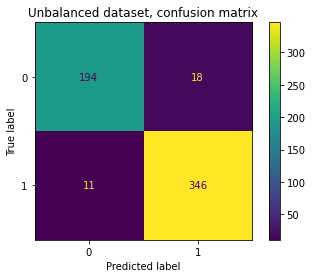

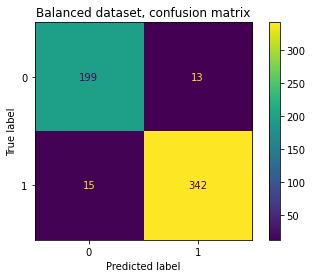

In [178]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# Unbalanced dataset
log_reg = LogisticRegression(solver = 'liblinear', random_state = 0)
y_pred_unbalanced = cross_val_predict(log_reg, X, y, cv = 10)
confusion_matrix_unbalanced = confusion_matrix(y, y_pred_unbalanced, labels=[0, 1])

# Balanced dataset
log_reg = LogisticRegression(solver = 'liblinear', random_state = 0, class_weight = "balanced")
y_pred_balanced = cross_val_predict(log_reg, X, y, cv = 10)
confusion_matrix_balanced = confusion_matrix(y, y_pred_balanced, labels=[0, 1])

# Displaying
print('Top right is the worst that can happen, since this is the numbers of undiagnosed maligniant cancer cases. Bottom left is also bad (diagnosed but not real malignant cancer cases)')
ConfusionMatrixDisplay(confusion_matrix_unbalanced).plot()
plt.title('Unbalanced dataset, confusion matrix')
ConfusionMatrixDisplay(confusion_matrix_balanced).plot()
plt.title('Balanced dataset, confusion matrix')

In [174]:
# Proper evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# precision score
print(f"""Precision Scores - ability of not to label as positive a sample that is negative:
    Unbalanced: {round(precision_score(y, y_pred_unbalanced),2)}
    Balanced: {round(precision_score(y, y_pred_balanced),2)}\n""")

# recall score
print(f"""Recall Scores - ability to find all the positive samples:
        Unbalanced: {round(recall_score(y, y_pred_unbalanced),2)}
        Balanced: {round(recall_score(y, y_pred_balanced),2)}\n""")

# F1
print(f"""F1 Scores - weighted average of the precision and recall:
        Unbalanced: {round(f1_score(y, y_pred_unbalanced),2)}
        Balanced: {round(f1_score(y, y_pred_balanced),2)}\n""")

# Area under the curve score
print(f"""Area Under the Curve Scores - compares the true positive and false positive rates:
        Unbalanced: {round(roc_auc_score(y, y_pred_unbalanced),2)}
        Balanced: {round(roc_auc_score(y, y_pred_balanced),2)}\n""")

# Confusion Matrix Summary
print(f"""Key changes in the confusion matrix, when balancing the dataset:
        False negatives avoided (most important): {confusion_matrix_unbalanced[0][1] - confusion_matrix_balanced[0][1]}
        False positives created: {confusion_matrix_balanced[1][0] - confusion_matrix_unbalanced[1][0]}""")

Precision Scores - ability of not to label as positive a sample that is negative:
    Unbalanced: 0.95
    Balanced: 0.96

Recall Scores - ability to find all the positive samples:
        Unbalanced: 0.97
        Balanced: 0.96

F1 Scores - weighted average of the precision and recall:
        Unbalanced: 0.96
        Balanced: 0.96

Area Under the Curve Scores - compares the true positive and false positive rates:
        Unbalanced: 0.94
        Balanced: 0.95

Key changes in the confusion matrix, when balancing the dataset:
        False negatives avoided (most important): 5
        False positives created: 4


## Findings (Question 3.3):

- The problem with using accuracy as the measure with an **unbalaced** dataset is that the skewness of the data might induce the model into predicting one class very well but not the other 
- The problem with using accuracy for this case as the measure even with a balanced dataset is that the false negatives matter much more than anything else, and therefore a more comprehensive method is needed, such as a confusion matrix
- Balancing the dataset resulted in false negatives going from 18 to 13 and, most importantly, stop outweighing the false positives (which are not as bad), although these increased from 11 to 15
- In general, balancing the dataset resulted in a more efficient model, and one that predicts better the most important cases too.

---
---